# Intro CNN - CIFAR10

Een **Convolutional Neural Network (CNN of ConvNet)** is een krachtig type neuraal netwerk, specifiek ontworpen voor beeldverwerking. CNNs zijn bijzonder effectief omdat ze:
- Automatisch belangrijke kenmerken uit afbeeldingen leren herkennen
- Rekening houden met de ruimtelijke structuur van beelden
- Efficiënter zijn dan traditionele neurale netwerken voor beeldverwerking
MOGELIJKS OP DE TEST

De architectuur bestaat uit:
- **Feature Extraction**: Convolutionele lagen detecteren patronen zoals randen, texturen en vormen
- **Classification**: Fully connected lagen gebruiken deze features voor classificatie

## Inhoudsopgave

1. **Dataset voorbereiding**
   - Data laden en voorbereiden 
   - Data verkenning en visualisatie
2. **Model architectuur**
   - Feature extractie & pooling
   - Classificatie  
3. **Training en evaluatie**
   - Basis training
   - Model prestaties
   - Optimalisatie experimenten
4. **Regularisatie**
   - Dropout toepassen
   - Data augmentatie
   - Early stopping

## Importeren van packages

In [2]:
# Installeer benodigde packages indien nog niet aanwezig
#!pip install scipy tensorflow matplotlib seaborn
!pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\frederic\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\frederic\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\frederic\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\frederic\anaconda3\Lib\site-packages\s

## Importeren van packages

We gebruiken opnieuw __TensorFlow__ om ons model op te stellen. Matplotlib zullen we hier gebruiken we om de dataset te visualiseren.

In [9]:
import tensorflow as tf
import numpy as np

# Tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualisatie
import matplotlib.pyplot as plt
import seaborn as sns

Zorg ervoor dat je minstens TensorFlow versie 2.0.0 geïnstalleerd hebt.

In [11]:
print(tf.__version__)

2.18.0


### 1.1 Data laden en voorbereiden

De CIFAR10-dataset is een standaard benchmark in computer vision die bestaat uit:
- 60.000 kleurenafbeeldingen (32x32 pixels)
- 10 verschillende categorieën
- 50.000 training en 10.000 test afbeeldingen
- 3 kleurkanalen (RGB)

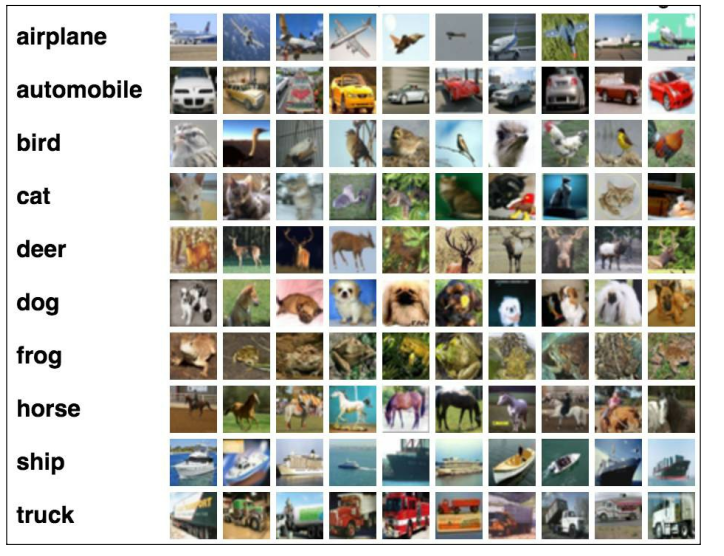

### 1.2 Data laden en normaliseren

Door de bekendheid van deze dataset kan deze rechstreeks gedownload en geladen worden via de <code>load_data()</code> functie in TensorFlow.

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

We kunnen vervolgens __de dimensies en het aantal afbeeldingen__ afdrukken:

In [19]:
print("Dimensies trainingset:{}".format(train_images.shape))
print("Dimensies testset:{}".format(test_images.shape))

Dimensies trainingset:(50000, 32, 32, 3)
Dimensies testset:(10000, 32, 32, 3)


Hieruit kunnen we opmerken dat elke afbeelding inderdaad uit __3 kleurkanalen bestaat (RGB)__.

In [21]:
'''TODO Normaliseer de pixel waarden zodat deze waarden aannemen tussen 0 en 1. Dit zal ervoor zorgen dat we efficiënter kunnen leren.'''
train_images = train_images / 255
test_images = test_images / 255

### 1.3 Categorieën

CIFAR10 bevat volgende 10 categorieën of labels:
0. airplane
1. automobile 
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

### 1.4 Visualisatie

We plotten enkele afbeeldingen uit de dataset zodat we een idee te krijgen hoe deze eruit ziet. 
</br>Zoals je zal zien zijn deze door hun lage resolutie erg wazig, maar toch kunnen we zonder veel moeite de objecten herkennen. 

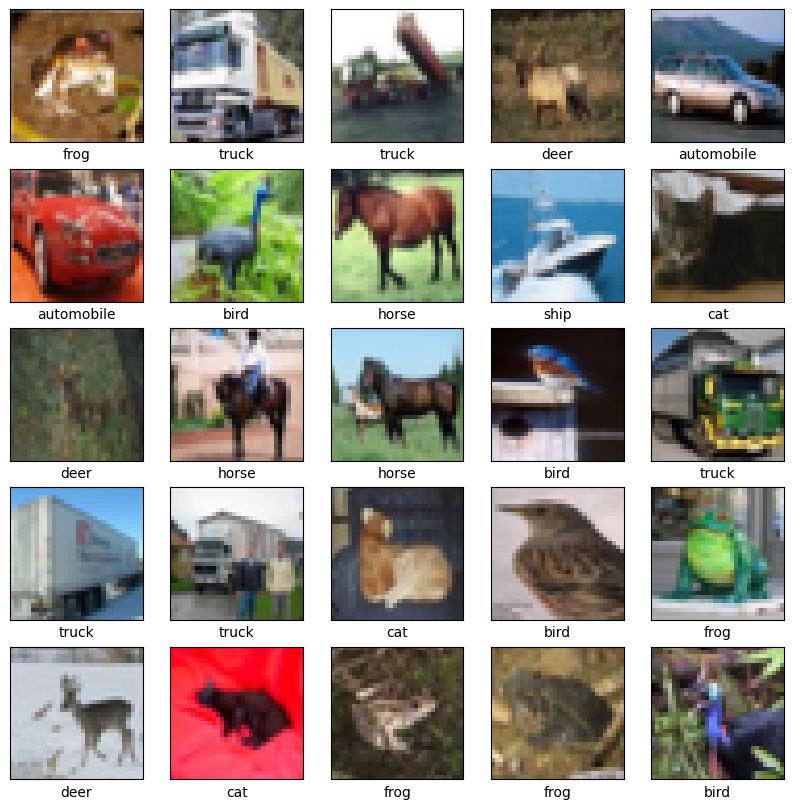

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

We visualiseren hoeveel samples elke klasse telt:

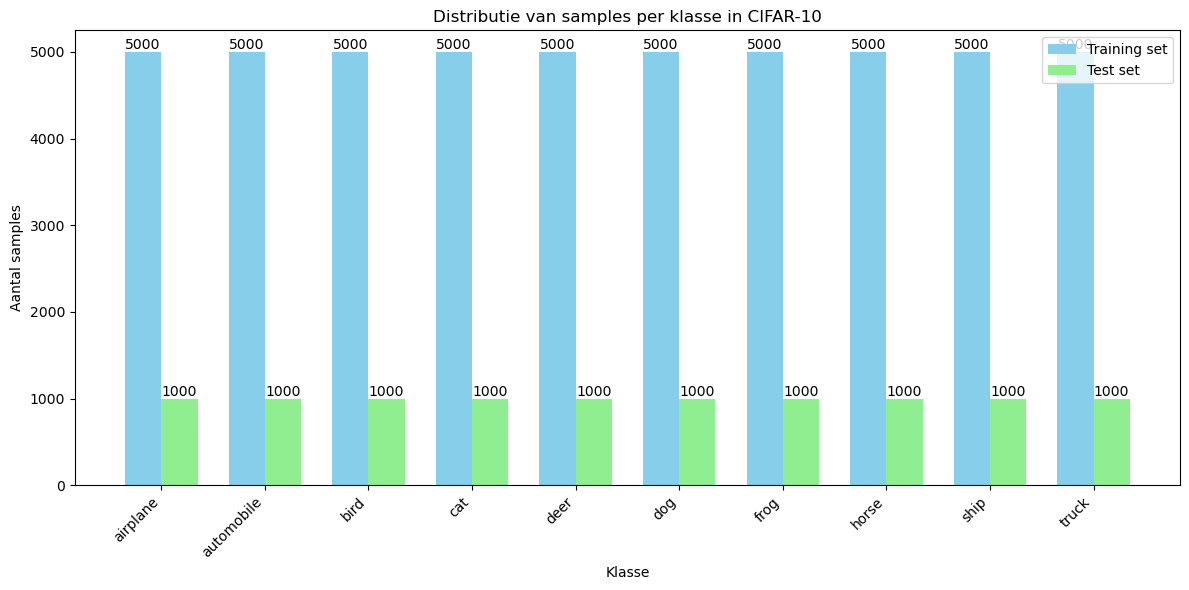


Aantal samples per klasse:
airplane     - Training:  5000, Test:  1000
automobile   - Training:  5000, Test:  1000
bird         - Training:  5000, Test:  1000
cat          - Training:  5000, Test:  1000
deer         - Training:  5000, Test:  1000
dog          - Training:  5000, Test:  1000
frog         - Training:  5000, Test:  1000
horse        - Training:  5000, Test:  1000
ship         - Training:  5000, Test:  1000
truck        - Training:  5000, Test:  1000


In [27]:
# Plot distributie van samples per CIFAR-10 klassen
plt.figure(figsize=(12, 6))

# Labels definiëren voor CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

# Tel samples per klasse
train_counts = np.bincount(train_labels.flatten())  # flatten want CIFAR labels zijn 2D
test_counts = np.bincount(test_labels.flatten())

# Maak een bar plot
x = np.arange(len(class_names))
width = 0.35
plt.bar(x - width/2, train_counts, width, label='Training set', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Test set', color='lightgreen')

# Labels en titel
plt.xlabel('Klasse')
plt.ylabel('Aantal samples')
plt.title('Distributie van samples per klasse in CIFAR-10')
plt.xticks(x, class_names, rotation=45, ha='right')
plt.legend()

# Aantallen boven bars
for i, count in enumerate(train_counts):
   plt.text(i - width/2, count, str(count), ha='center', va='bottom')
for i, count in enumerate(test_counts):
   plt.text(i + width/2, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print aantallen
print("\nAantal samples per klasse:")
for i, name in enumerate(class_names):
   print(f"{name:12} - Training: {train_counts[i]:5d}, Test: {test_counts[i]:5d}")

### Bekijk individuele afbeeldingen

image_index = 25
plt.figure(figsize=(10,5))
plt.imshow(train_images[image_index])
plt.title(f"Label: {class_names[train_labels[image_index][0]]}")
plt.show()

## 2. Model architectuur

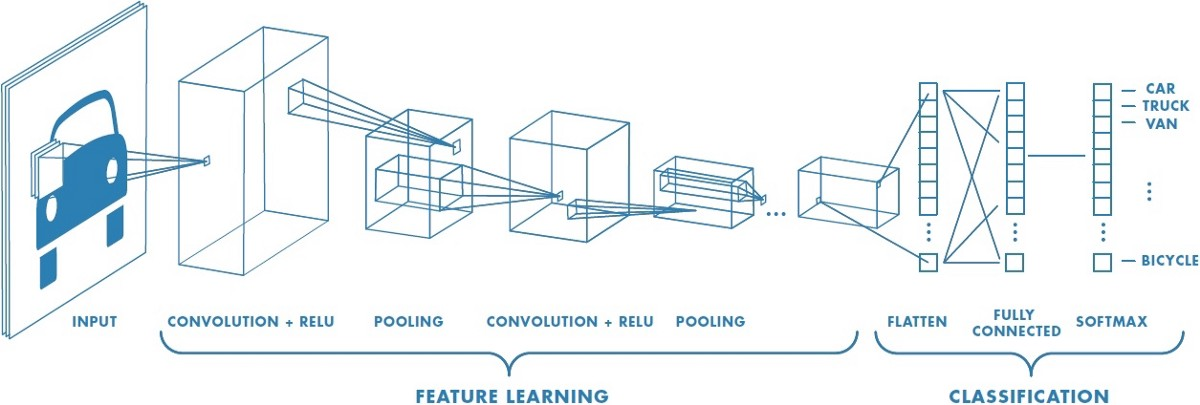

### 2.1 CNN architectuur overzicht

Een CNN bestaat uit twee belangrijke onderdelen:
1. **Feature extractie**: Convolutionele lagen detecteren belangrijke kenmerken in de afbeeldingen
2. **Classificatie**: Dense lagen gebruiken deze kenmerken om de uiteindelijke voorspelling te maken

Het model dat we gaan bouwen heeft de volgende opbouw:
- Input laag (32x32x3)  
- 2 sets van Conv2D + MaxPooling2D
- Flatten laag
- Dense laag (64 neuronen)
- Output laag (10 klassen)

Aan de hand van de TensorFlow <code>Sequential</code> klasse kunnen we de verschillende lagen op elkaar stapelen en zo ons model opbouwen:

In [62]:
model = models.Sequential()

### CNN - Feature learning 

In de eenvoudigste, meest traditionele vorm bestaat het __feature learning__ gedeelte van het netwerk uit __een of meerdere sets van een convolutionele en pooling laag.__ 

__Opmerking:__ Door het toepassen van regularisatietechnieken kunnen we overfitting proberen voorkomen. Veel van deze technieken (waaronder <code>BatchNormalization()</code> en <code>Dropout()</code>) kunnen we toepassen op een of meerdere lagen van ons model door deze via <code>model.add()</code> toe te voegen.

In [66]:
'''
    TODO: 
    - Definieer een nieuwe conv. laag met 64 filters van 3x3. Gebruik relu als activatiefunctie.
    - Voorzie een maxpooling laag met kernel = 2x2 en stride = 2.
    
    Pointers: 
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
    
'''
model.add(layers.Input(shape=(32,32,3)))
    
# Eerste conv2D + pooling laag

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Tweede conv2D + pooling laag
          
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

De architectuur van ons netwerk kunnen we vervolgens visueel weergeven via <code>model.summary()</code>:

In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

Je kan hier ook het __aantal parameters (of de te trainen gewichten)__ aflezen. 
</br>Zoals je ziet is dit al snel een aanzienlijk aantal, zelfs voor een klein aantal lagen.

__Pooling__: 
</br>Door het toepassen van downsampling op de output van de convolutionele laag (= de feature maps) wordt de output steeds kleiner. Dit heeft volgende __belangrijke voordelen__ (zie ook theorie):
- Verlaagt de dimensie van de feature maps => minder parameters om te leren => sneller
- Behoudt de ruimtelijke informatie (kan gezien worden als vorm van generalisatie doordat niet de specifieke locatie van features in de afbeelding wordt weergeven)

Naarmate de dimensies van de output kleiner worden in verdere lagen (net door deze pooling toe te passen), kunnen we meer filters toevoegen in de convolutionele lagen (en dus meer features leren).

### CNN - Classifier

Vervolgens voegen we een het classificatie-gedeelte toe aan ons netwerk waardoor we effectief voorspellingen kunnen maken. Het resultaat van de laatste conv. laag is een feature map in matrixvorm. Als we dit willen voeden aan ons classificatienetwerk, moeten we deze eerst omzetten naar een vector (zie <code>Flatten())</code>.
De laatste laag is een <code>Dense</code>laag met <code>Softmax</code> activatiefunctie. Hierdoor krijgt voor elk example elke class een probabiliteit toegekend tussen 0 en 1, waarbij hun som gelijk is aan 1.

In [73]:
''' 
    TODO: 
    
    Breid het netwerk uit met de classifier die de vorm aanneemt van een dense netwerk. Hierbij is het volgende belangrijk:
    - De output van het feature learning gedeelte van het netwerk (= feature map in matrix vorm) moet eerst vlak gemaakt worden. Tip: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
    - Je voorziet een fully-connected hidden laag met 64 neuronen en RELU als activatiefunctie.
    - Je voorziet een laatste laag met het correct aantal neuronen en de softmax activatiefunctie. 
'''

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


# Flatten laag
# Dense laag met 64 neuronen en RELU als activatiefunctie
# Dense laag met het correct aantal neuronen en de softmax activatiefunctie

De complete architectuur kunnen we vervolgens weer afdrukken:

In [76]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Training en evaluatie

Nu ons model volledig is opgebouwd, kunnen we het compileren. Daarbij moeten we ook het volgende meegeven:
- __De gekozen optimizer:__ Er is hier geen "beste" keuze, die zal voornamelijk afhangen van je model en toepassing. Er zijn natuurlijk wel enkele "nieuwe" optimizers die beter presteren dan de klassieke. (Zie ook: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- __De loss functie:__ Hier moet je nadenken over hoe je probleem eruit ziet: hier gaat het om classificatie en het resultaat van onze voorspelling vormt een probabiliteit, waardoor de *categorical cross entropy loss* een goede keuze zou zijn. Bekijk zeker ook volgende link om de juiste keuze te maken: https://cwiki.apache.org/confluence/display/MXNET/Multi-hot+Sparse+Categorical+Cross-entropy
- __Metric:__ Op basis van welke metriek ga je de kwaliteit van je model evalueren? (Zie ook: https://www.tensorflow.org/api_docs/python/tf/keras/metrics). Meestal zullen we *accuracy* gebruiken, maar er zijn er nog andere die in bepaalde situaties aanbevolen zijn.

In [83]:
'''TODO: Kies de adam optimizer en voorzie de juiste loss functie'''
optimizer = 'adam' # vul in
loss = tf.keras.losses.SparseCategoricalCrossentropy() # vul aan
metric = ['accuracy'] # vul in

Vervolgens compileren we ons model:

In [86]:
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

### 3.2 Trainen

Wanneer we ons model trainen via <code>model.fit()</code>, kunnen we een <code>history</code> object bijhouden. Dit object houdt de __loss (training en test)__ en __accuracy (training en test)__ bij over de verschillende epochs. Aangezien het niet zo efficiënt is om telkens de volledige dataset aan ons neuraal netwerk aan te leveren (probleem van trage convergentie en lokale minima/saddle points)*(zie ook theorie)*, zullen we ons model trainen __op een deel van de dataset per iteratie__. Het aantal examples dat we per iteratie trainen noemen we __de batch size__. 

We kiezen er hier voor om ons model te trainen over __5 epochs__ en een __batch size van 64__. Als je zelf een model opbouwt zijn dit ontwerpbeslissingen waarover je moet nadenken.

In [90]:
NUM_EPOCHS = 5
BATCH_SIZE = 64

In [92]:
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, validation_data=(test_images, test_labels), batch_size=BATCH_SIZE)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.3733 - loss: 1.7293 - val_accuracy: 0.5425 - val_loss: 1.2856
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5727 - loss: 1.2123 - val_accuracy: 0.6165 - val_loss: 1.1246
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6346 - loss: 1.0484 - val_accuracy: 0.6587 - val_loss: 0.9878
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6697 - loss: 0.9488 - val_accuracy: 0.6598 - val_loss: 0.9631
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6933 - loss: 0.8815 - val_accuracy: 0.6748 - val_loss: 0.9340


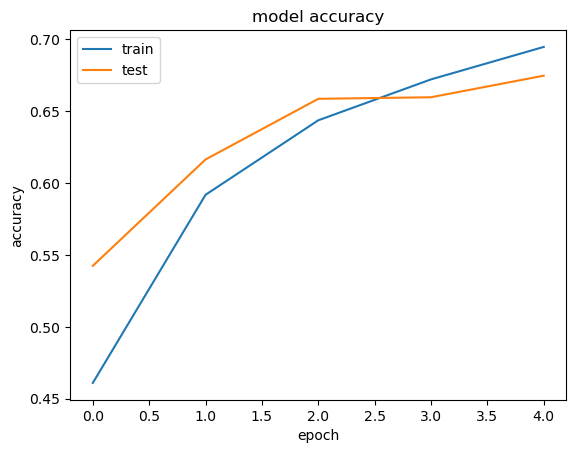

In [94]:
# Plot de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3.3 Model evaluatie

De __accuracy__ is een metric die geeft aan __hoeveel % van onze voorspellingen correct waren__. Meer info over de metrics die je kan selecteren: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/
</br>We kunnen de accuracy samen met de loss plotten, zowel van onze trainingset als testset.

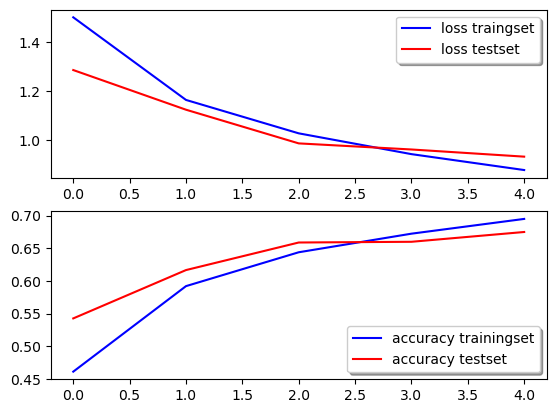

In [97]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss traingset')
ax[0].plot(history.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

#### Experimenteren met verschillende optimizers


Testing Adam met learning rate 0.01
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.4684 - loss: 1.5932 - val_accuracy: 0.5630 - val_loss: 1.2707
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5916 - loss: 1.1581 - val_accuracy: 0.5714 - val_loss: 1.2082
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6290 - loss: 1.0614 - val_accuracy: 0.6045 - val_loss: 1.1391
Validatie accuracy: 0.6045

Testing Adam met learning rate 0.001
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7078 - loss: 0.8252 - val_accuracy: 0.6724 - val_loss: 0.9838
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7497 - loss: 0.7194 - val_accuracy: 0.6760 - val_loss: 0.9789
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7612 - loss: 0.6775 - val_accuracy: 0.6825 - val_loss: 0.9661
Validatie accuracy: 0.6825

Testing Adam met learning rate 0.0001
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - acc

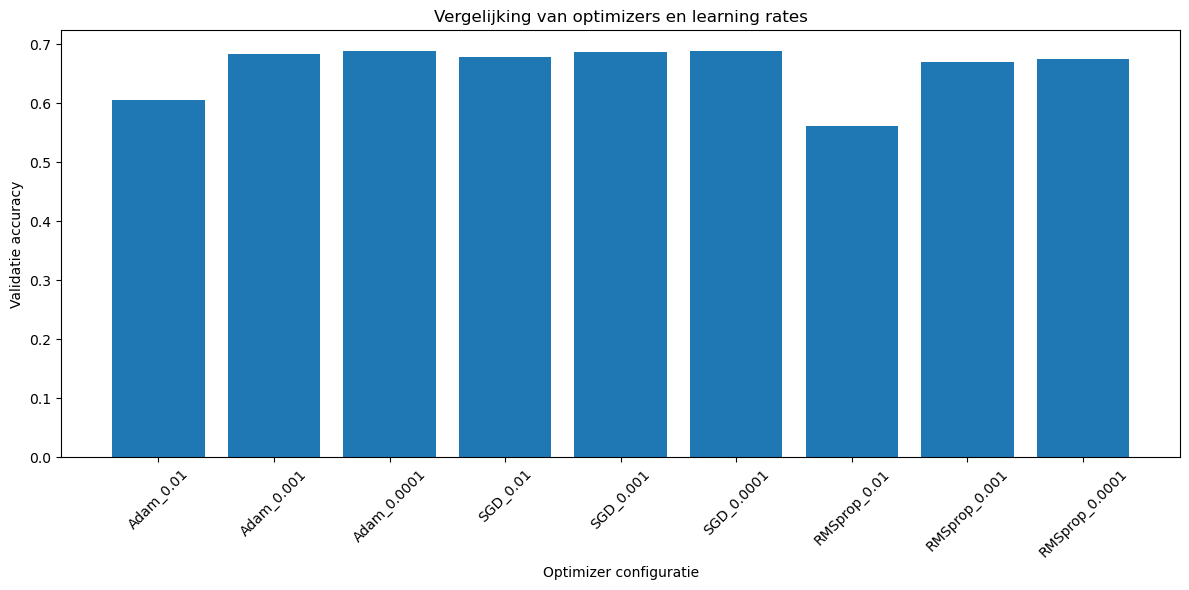

In [100]:
def train_with_optimizer(optimizer, lr):
    model.compile(
        optimizer=optimizer(learning_rate=lr),
        loss=loss,
        metrics=metric
    )
    return model.fit(
        train_images, train_labels,
        epochs=3,
        validation_data=(test_images, test_labels),
        batch_size=BATCH_SIZE
    )

optimizers = {
    'Adam': tf.keras.optimizers.Adam,
    'SGD': tf.keras.optimizers.SGD,
    'RMSprop': tf.keras.optimizers.RMSprop
}

learning_rates = [1e-2, 1e-3, 1e-4]
results = {}

for opt_name, opt in optimizers.items():
    for lr in learning_rates:
        print(f"\nTesting {opt_name} met learning rate {lr}")
        history = train_with_optimizer(opt, lr)
        val_acc = history.history['val_accuracy'][-1]
        results[f"{opt_name}_{lr}"] = val_acc
        print(f"Validatie accuracy: {val_acc:.4f}")

plt.figure(figsize=(12,6))
plt.bar(results.keys(), results.values())
plt.title('Vergelijking van optimizers en learning rates')
plt.xlabel('Optimizer configuratie')
plt.ylabel('Validatie accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Regularisatie

Om overfitting te voorkomen kunnen we gebruik maken van enkele regularisatietechnieken (zie ook theorie):
- Dropout (Zie https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
- Batch normalization (Zie https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
- L1 & L2 normalization (Zie https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2)
- Data augmentatie (Zie https://www.tensorflow.org/tutorials/images/data_augmentation)
- Early Stopping (Zie https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

### Dropout

Dropout zal overfitting vermijden door tijdens het trainen een deel van de activaties te deactiveren. Je kan dit eenvoudig toepassen door onderstaande code toe te voegen na de laag waaop je dropout wil toepassen:
<code>tf.keras.layers.Dropout(0.2)</code>*(in dit geval zullen we 20% van de neuronen deactiveren)*

Laten we het effect van Dropout visualiseren door twee modellen te vergelijken - één met en één zonder Dropout:

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2578 - loss: 1.9766 - val_accuracy: 0.4762 - val_loss: 1.4471
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4529 - loss: 1.5013 - val_accuracy: 0.5463 - val_loss: 1.2801
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5159 - loss: 1.3539 - val_accuracy: 0.5760 - val_loss: 1.2053
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5470 - loss: 1.2594 - val_accuracy: 0.6169 - val_loss: 1.0996
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5668 - loss: 1.2119 - val_accuracy: 0.6339 - val_loss: 1.0540


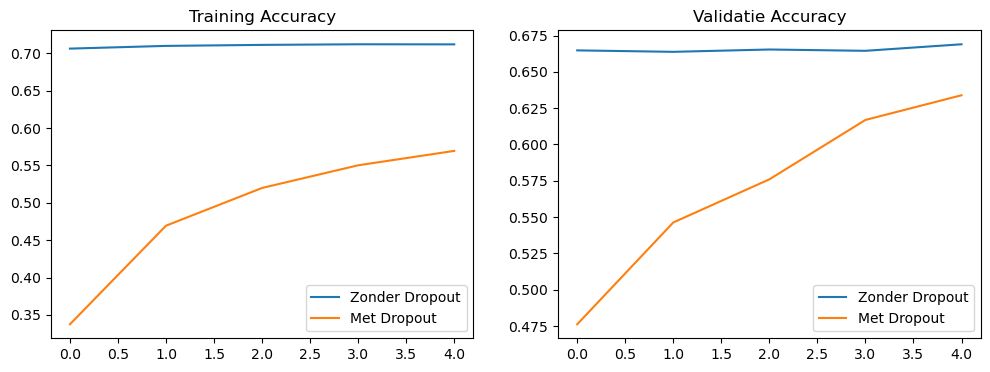

In [129]:
def visualiseer_dropout_effect():
    model_met_dropout = models.Sequential()
    # Input laag
    model_met_dropout.add(Input(shape=(32, 32, 3)))
    
    # Convolutionele lagen met dropout
    model_met_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model_met_dropout.add(layers.MaxPooling2D((2, 2)))
    model_met_dropout.add(layers.Dropout(0.25))
    
    model_met_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_met_dropout.add(layers.MaxPooling2D((2, 2)))

    model_met_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_met_dropout.add(layers.MaxPooling2D((2, 2)))
    
    # Dense lagen
    model_met_dropout.add(layers.Flatten())
    model_met_dropout.add(layers.Dense(64, activation='relu'))
    model_met_dropout.add(layers.Dropout(0.25))
    model_met_dropout.add(layers.Dense(10, activation='softmax'))
    
    # Compile en train
    model_met_dropout.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
    
    history_dropout = model_met_dropout.fit(train_images, train_labels, 
                                          epochs=5, validation_split=0.2)
    
    # Plot vergelijking
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Zonder Dropout')
    plt.plot(history_dropout.history['accuracy'], label='Met Dropout')
    plt.title('Training Accuracy')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(history.history['val_accuracy'], label='Zonder Dropout')
    plt.plot(history_dropout.history['val_accuracy'], label='Met Dropout')
    plt.title('Validatie Accuracy')
    plt.legend()
    plt.show()

visualiseer_dropout_effect()

### Data augmentatie

Bij wijze van voorbeeld gaan we data augmentatie toepassen. Dit kan eenvoudig door een <code>ImageDataGenerator</code> toe te passen waar we de transformaties definiëren:

In [105]:
# Data augumetation
datagen = ImageDataGenerator(
    rotation_range=0.3,  
    zoom_range = 0.1, 
    horizontal_flip=True
)

De <code>ImageDataGenerator</code> zal in real-time aan data augmentatie doen. Dit wil zeggen dat de dataset zelf niet aangroeit, maar dat er *on-the-fly* data transformaties gebeuren tijdens elke epoch en dat deze transformaties gebruikt worden voor training. Het aantal afbeeldingen in elke epoch blijft daarom gelijk aan het origineel aantal afbeeldingen (wanneer we geen transformaties toepassen).

### Early Stopping

Early Stopping is een techniek die overfitting probeert te voorkomen door het trainen te stoppen van zodra de loss voor de testset begint te stijgen. Dit geeft namelijk aan dat ons model het goed doet voor de trainingsdata, maar niet meer voor data die het nog niet heeft gezien. 

We kunnen Early Stopping eenvoudig in ons model inbouwen door het voorzien van een callback, die we meegeven aan de <code>model.fit()</code> functie:

<code>tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1)</code>

De parameter <code>patience</code> geeft hierbij aan na hoeveel epochs zonder verbetering er gestopt mag worden met trainen. 

In [110]:
# Early Stopping configuratie
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Monitor validatie loss
    patience=5,             # Wacht 5 epochs voor stoppen
    verbose=1,             # Toon voortgang
    restore_best_weights=True  # Herstel beste model
)

We kunnen nu opnieuw het model trainen, maar ditmaal passen we de <code>ImageDataGenerator</code> en <code>EarlyStopping</code> toe.

In [112]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE), validation_data=(test_images, test_labels), epochs=NUM_EPOCHS, callbacks=[es])

Epoch 1/5


C:\Users\frede\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7067 - loss: 0.8915 - val_accuracy: 0.6648 - val_loss: 1.0644
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7152 - loss: 0.8532 - val_accuracy: 0.6638 - val_loss: 1.0584
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7113 - loss: 0.8690 - val_accuracy: 0.6654 - val_loss: 1.0519
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7126 - loss: 0.8476 - val_accuracy: 0.6645 - val_loss: 1.0503
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7085 - loss: 0.8534 - val_accuracy: 0.6690 - val_loss: 1.0407
Restoring model weights from the end of the best epoch: 5.


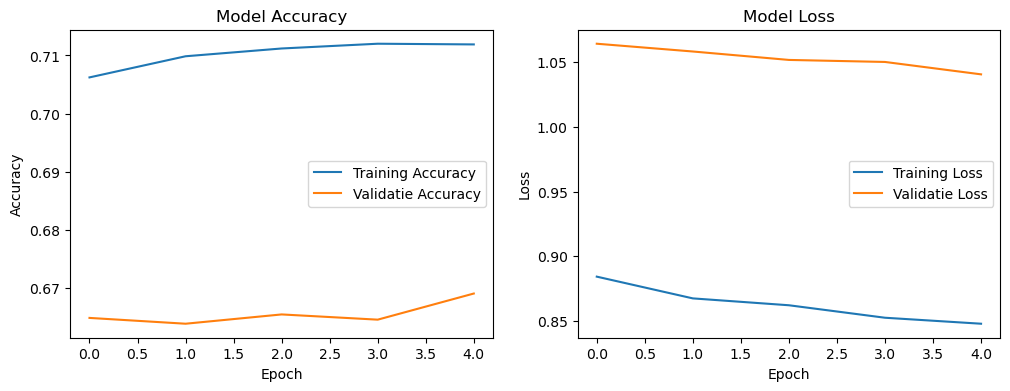

In [113]:
# Plot training geschiedenis
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validatie Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validatie Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


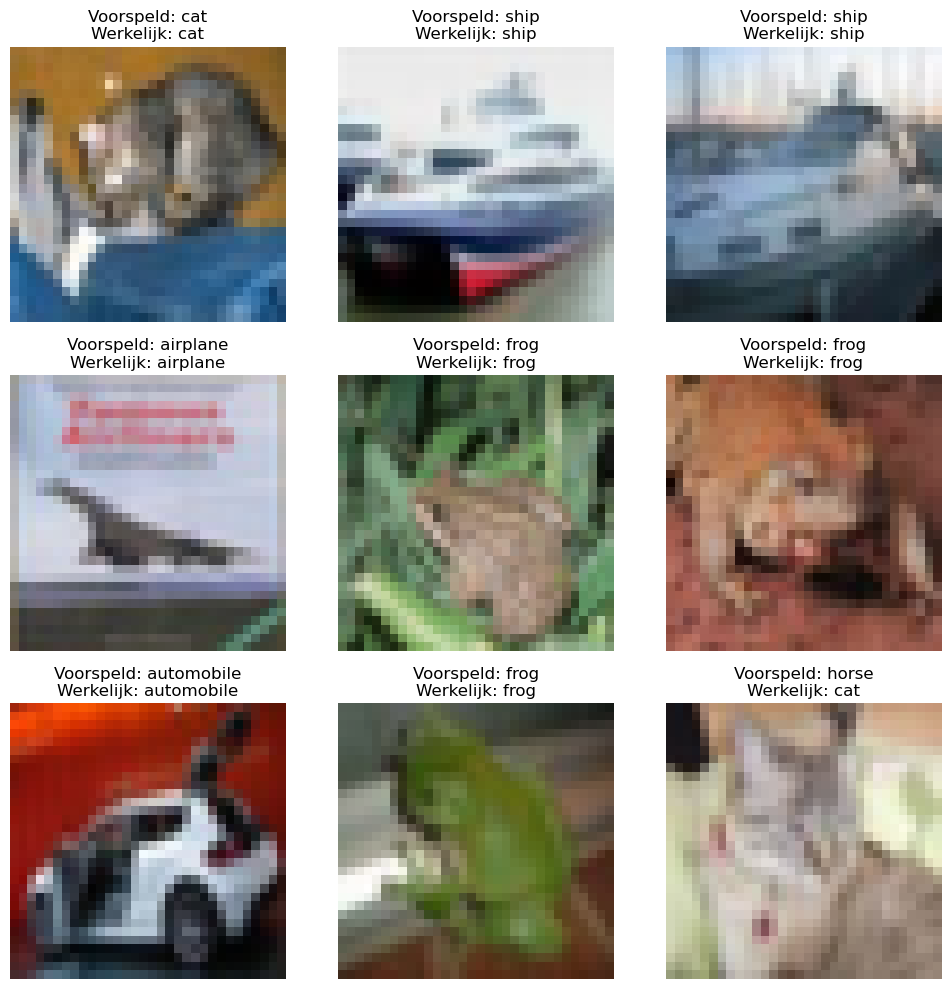

In [119]:
# Voorspellingen visualiseren
predictions = model.predict(test_images)
pred_classes = np.argmax(predictions, axis=1)

# Toon enkele voorbeelden
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f'Voorspeld: {class_names[pred_classes[i]]}\nWerkelijk: {class_names[test_labels[i][0]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Evalueren van het model na toepassen van regularisatie

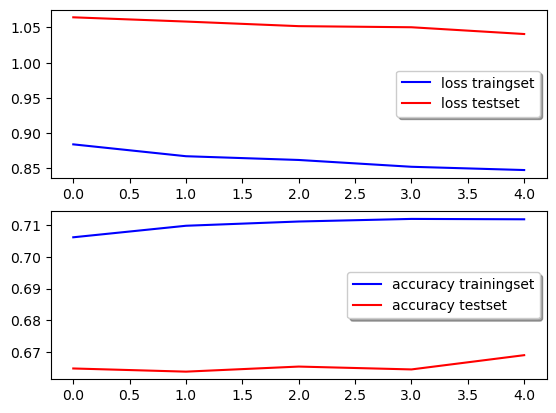

In [122]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss traingset')
ax[0].plot(history.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

Vergelijk nu beide resultaten (zonder en mét regularisatie). Hebben we betere resultaten bekomen?

## Visualisatie van voorspellingen

Laten we kijken naar specifieke voorbeelden van correcte en incorrecte voorspellingen van ons model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


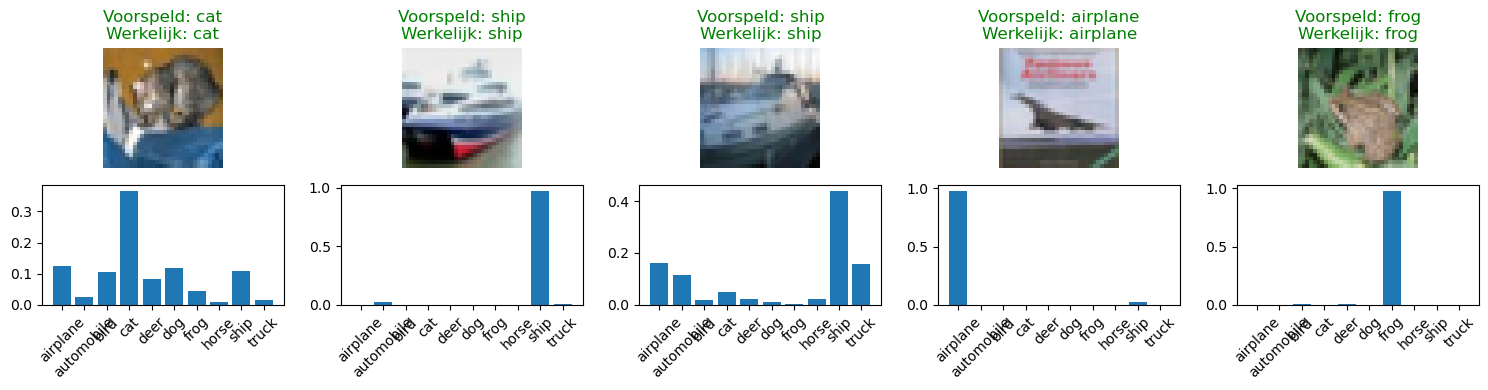

In [124]:
def toon_voorspellingen(model, images, labels, num=5):
    predictions = model.predict(images[:num])
    plt.figure(figsize=(15, 4))
    
    for i in range(num):
        plt.subplot(2, num, i+1)
        plt.imshow(images[i])
        predicted = class_names[np.argmax(predictions[i])]
        actual = class_names[labels[i][0]]
        color = 'green' if predicted == actual else 'red'
        plt.title(f'Voorspeld: {predicted}\nWerkelijk: {actual}', 
                 color=color)
        plt.axis('off')
        
        # Toon voorspellingszekerheid
        plt.subplot(2, num, i+num+1)
        plt.bar(class_names, predictions[i])
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Test op enkele voorbeelden
toon_voorspellingen(model, test_images, test_labels)

## Uitbreidingsmogelijkheden

Experimenteer met:
- Toevoegen van extra convolutionele lagen
- Aanpassen van aantal filters
- Toevoegen van BatchNormalization
- Verschillende learning rates
- Aanpassen van de dropout rate

Probeer het netwerk te optimaliseren om een hogere accuracy te behalen.